PCA on oil flow data (Figure 12.8 of PRML
)

Tatsuo Okubo

2025/07/16

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = np.loadtxt('../data/oil_flow/DataTrn.txt')  # 12 dimensional observations for 1000 points
label = np.loadtxt('../data/oil_flow/DataTrnLbls.txt')  # label on flow configuration

In [3]:
N = data.shape[0]
D = data.shape[1]
print(f'# of samples: N = {N}')
print(f'dimension: D = {D}')

# of samples: N = 1000
dimension: D = 12


In [4]:
X = data - data.mean(axis=0, keepdims=True)

In [5]:
S = (1 / N) * X.T @ X  # data covariance matrix

In [6]:
lambdas, U = np.linalg.eigh(S)
idx = lambdas.argsort()[::-1]
lambdas = lambdas[idx]
U = U[:, idx]

In [7]:
Z = X @ U[:, :2]  # project the data onto the first two principal components

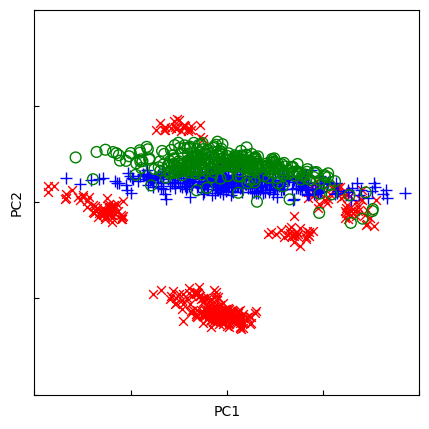

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

mask_red = np.all(label == [0, 0, 1], axis=1)
mask_blue = np.all(label == [1, 0, 0], axis=1)
mask_green = np.all(label == [0, 1, 0], axis=1)
ax.scatter(-Z[mask_red, 0], Z[mask_red, 1], s=40, c='red', marker='x', lw=1)
ax.scatter(-Z[mask_blue, 0], Z[mask_blue, 1], s=80, c='blue', marker='+', lw=1)
ax.scatter(-Z[mask_green, 0], Z[mask_green, 1], s=60, facecolors='none', edgecolors='green', marker='o', lw=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_aspect('equal', adjustable='box')

# just to match the asthetics of Figure 12.8
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks(np.arange(-3, 4, 1.5))
ax.set_yticks(np.arange(-3, 4, 1.5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', direction='in')
plt.show()